In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

balanced_data = pd.read_csv('HTA_balanceado.csv')
clasificadores = ['Benigno','Maligno']
balanced_data.head(10)

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2.0,45.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,...,64.7,154.0,48.5,33.5,0.0,108.0,1.0,24.063708,1.0,1.0
1,2.0,52.0,14.6,26.0,3.2,3.7,42.0,94.0,191.0,0.45,...,64.7,154.0,48.5,33.5,0.0,141.0,4.0,31.283920,0.0,1.0
2,2.0,57.0,14.7,24.0,6.1,3.1,24.0,52.0,106.0,0.58,...,64.7,154.0,48.5,33.5,0.0,109.0,2.0,42.253185,2.0,1.0
3,2.0,51.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,...,64.7,154.0,48.5,33.5,0.0,109.0,3.0,31.370681,0.0,1.0
4,2.0,45.0,13.4,29.0,4.8,4.0,34.0,86.0,139.0,0.58,...,64.7,154.0,48.5,33.5,0.0,103.0,3.0,21.313342,2.0,0.0
5,2.0,32.0,14.5,20.0,2.5,3.6,38.0,87.0,170.0,0.42,...,64.7,154.0,48.5,33.5,0.0,120.0,4.0,21.089409,1.0,1.0
6,2.0,36.0,11.5,22.0,2.6,3.3,41.0,80.0,126.0,0.51,...,64.7,154.0,48.5,33.5,0.0,118.0,4.0,21.622669,1.0,0.0
7,2.0,29.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,...,64.7,154.0,48.5,33.5,0.0,120.0,2.0,24.598958,2.0,1.0
8,2.0,31.0,13.6,22.0,4.3,4.3,54.0,108.0,168.0,0.65,...,64.7,154.0,48.5,33.5,0.0,115.0,4.0,26.321725,1.0,1.0
9,1.0,44.0,15.3,14.0,6.0,3.1,31.0,114.0,185.0,0.77,...,64.7,154.0,48.5,33.5,0.0,134.0,2.0,32.988070,2.0,1.0


In [2]:
balanced_data.groupby('riesgo_hipertension').size()

riesgo_hipertension
0.0    1671
1.0    1671
dtype: int64

In [3]:
y = balanced_data['riesgo_hipertension']
x = balanced_data[['masa_corporal', 'tension_arterial', 'medida_cintura', 'peso', 'actividad_total', 'edad', 'estatura', 'sexo', 'sueno_horas', 'valor_hemoglobina_glucosilada', 'valor_insulina', 'resultado_glucosa_promedio', 'concentracion_hemoglobina', 'valor_colesterol_ldl', 'valor_trigliceridos']]

         Benigno  Maligno
Benigno      507        8
Maligno       75      413
              precision    recall  f1-score   support

     Benigno       0.87      0.98      0.92       515
     Maligno       0.98      0.85      0.91       488

    accuracy                           0.92      1003
   macro avg       0.93      0.92      0.92      1003
weighted avg       0.92      0.92      0.92      1003



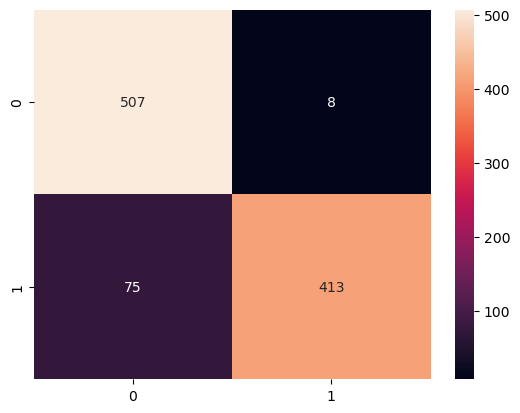

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)

from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=2)

#Entrenar el algoritmo
knn_mm.fit(x_train,y_train)
predicciones = knn_mm.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,predicciones).ravel()

sns.heatmap(confusion_matrix(y_test,predicciones), annot=True, fmt="d")
            
labels = ["Benigno","Maligno"]
matriz = confusion_matrix(y_test,predicciones, labels=[0,1])
print(pd.DataFrame(matriz, index = labels, columns = labels))

print(classification_report(y_test,predicciones,target_names=clasificadores))
#Columnas lo que dice el sistema, filas lo que dice la realidad

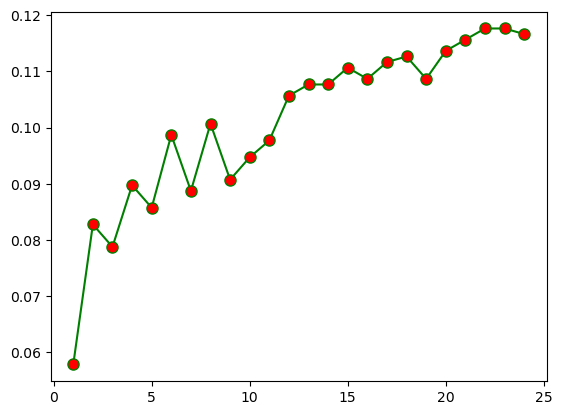

In [5]:
tasa_error = []
for i in range(1,25):
    knn_mm = KNeighborsClassifier(n_neighbors=i)
    knn_mm.fit(x_train,y_train)
    prediccion_i = knn_mm.predict(x_test)
    tasa_error.append(np.mean(prediccion_i != y_test))

valores = range(1,25)
plt.plot(valores, tasa_error, color='green', marker='o', markerfacecolor = 'red', markersize='8')

              precision    recall  f1-score   support

     Benigno       0.90      0.95      0.93       515
     Maligno       0.95      0.89      0.92       488

    accuracy                           0.92      1003
   macro avg       0.92      0.92      0.92      1003
weighted avg       0.92      0.92      0.92      1003



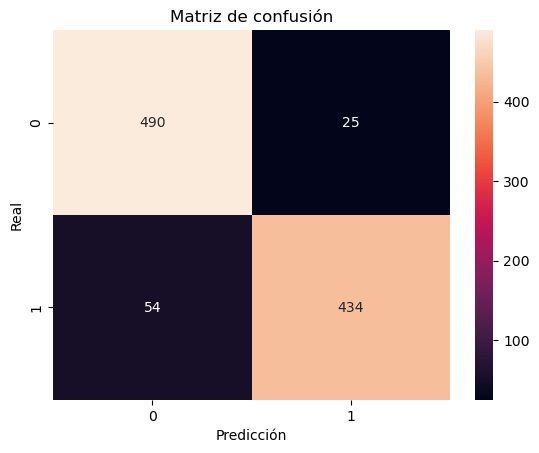

In [6]:
knn_mm = KNeighborsClassifier(n_neighbors=3)
knn_mm.fit(x_train,y_train)
predicciones = knn_mm.predict(x_test)

sns.heatmap(confusion_matrix(y_test,predicciones), annot=True, fmt="d")
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')

print(classification_report(y_test, predicciones, target_names=clasificadores))